# Model (Classification Algorithm)
___

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [16]:
#Load encoded set

df_model_raw = pd.read_csv("/Users/sa14/Desktop/fin eda final/data/Encoded_Set.csv")

___
## Feature List, Target Variable, and Test-Train-Split
___

In [22]:
# Create a list of Features to be stored in "X"
# The Features list will not include "IsFraud as that will be the target feature"
X = df_model_raw.drop(columns=["isFraud"])  

# Target: "isFraud" column
y = df_model_raw["isFraud"] 

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [26]:
#Import SMOTE for this code block
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [27]:
#Import StandardScaler for this code block
from sklearn.preprocessing import StandardScaler

# Normalize data with StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [29]:
#Get count of rows & columns for X_test and X_train
X_train.shape, X_test.shape

((5090096, 10), (1272524, 10))

In [28]:
#Get details of the X_Train set
X_train.dtypes

Unnamed: 0          int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object

In [38]:
#Define function to plot Confusion Matrix 
def make_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

___
## Prediction Model
___

In [33]:
#Utilize Logistic Regression Prediction Model
model_logreg = LogisticRegression(class_weight='balanced')
model_logreg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced')

In [34]:
# Calculate predicitions and evaluate
y_pred_logreg = model_logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression F1_Score: ", f1_logreg)

Logistic Regression F1_Score:  0.05175934915798989


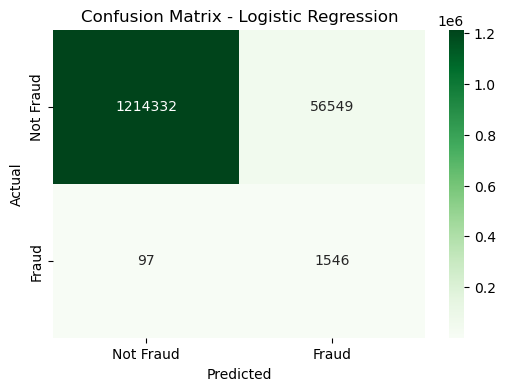

In [39]:
#Display Confusion Matrix
make_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

___
>> ### **Insight**
The F1 Score of 0.05175934915798989 indicates a poor performing model despite some accuracy with classifying fraud.
___